## 와인 분류 모델

In [2]:
import pandas as pd

In [3]:
wine = pd.read_csv('https://bit.ly/wine-date')

In [4]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


### data and target
- data = 'alcohol', 'sugar', 'pH'
- target = 'class'

In [5]:
# 샘플 수 확인 및 NaN값 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
# NaN값 확인
wine.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [6]:
# 기초통계량
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [12]:
# 가장 높은 도수 확인
wine['alcohol'].max()

14.9

In [21]:
# 평균 도수 소수점 2자리수 까지만
wine['alcohol'].mean().round(2)

10.49

In [22]:
# 가장 낮은 도수 확인
wine['alcohol'].min()

8.0

In [23]:
# 가장 높은 당도 확인
wine['sugar'].max()

65.8

In [18]:
# 가장 낮은 당도 확인
wine['sugar'].min()

0.6

In [14]:
# 가장 높은 산도 확인
wine['pH'].max()

4.01

In [24]:
# 가장 낮은 산도 확인
wine['pH'].min()

2.72

In [10]:
# 타겟 확인
wine['class'].unique()

array([0., 1.])

In [11]:
# 타겟이 float인게 보기 안좋으니 int로 데이터타입 변경
wine['class'] = wine['class'].astype(int)
wine['class']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: class, Length: 6497, dtype: int32

### class
- class가 0이면 레드 와인 
- class가 1이면 화이트 와인

### 특정 조건으로 해당 행 출력

In [26]:
# 도수가 평균과 같거나 이상인 샘플 출력
wine[wine['alcohol']>=wine['alcohol'].mean()]

,alcohol,sugar,pH,class
9,10.5,6.1,3.35,0
11,10.5,6.1,3.35,0
16,10.5,1.8,3.30,0
31,10.6,2.5,3.46,0
36,10.8,2.4,3.42,0
...,...,...,...,...
6489,11.8,2.2,3.06,1
6490,10.6,0.9,3.24,1
6492,11.2,1.6,3.27,1
6495,12.8,1.1,3.34,1


In [29]:
# 산도가 가장 높은 샘플 출력
wine[wine['pH']==wine['pH'].max()]

,alcohol,sugar,pH,class
1316,12.5,1.2,4.01,0
1321,12.5,1.2,4.01,0


### 여러 조건으로 해당 행 출력

In [39]:
# 도수가 10이고 당도가 5 이상인 샘플 출력
wine[(wine['alcohol']==10) & (wine['sugar']==5)]

,alcohol,sugar,pH,class
5829,10.0,5.0,2.94,1
6343,10.0,5.0,3.67,1


In [40]:
# 도수가 12보다 높고 산도가 3보다 높은 샘플의 'alcohol', 'pH', 'class' 만 출력
wine[['alcohol', 'pH', 'class']][(wine['alcohol']>12) & (wine['pH']>3)]

,alcohol,pH,class
45,13.10,3.90,0
95,12.90,3.85,0
131,13.00,3.63,0
132,13.00,3.63,0
142,14.00,3.68,0
...,...,...,...
6466,13.00,3.27,1
6470,12.05,3.37,1
6485,12.15,3.21,1
6486,13.00,3.04,1


### loc, iloc 사용

In [64]:
class_1 = []
for i in wine.index:
    if wine.loc[i, "class"] == 1:
        print(i)
        class_1.append(i)

1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798


In [65]:
# 클래스가 1인 행으로만 이루어진 데이터프레임
df = pd.DataFrame()
df = wine.loc[class_1, :]
df

,alcohol,sugar,pH,class
1599,8.8,20.7,3.00,1
1600,9.5,1.6,3.30,1
1601,10.1,6.9,3.26,1
1602,9.9,8.5,3.19,1
1603,9.9,8.5,3.19,1
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [66]:
# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)
df

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1
...,...,...,...,...
4893,11.2,1.6,3.27,1
4894,9.6,8.0,3.15,1
4895,9.4,1.2,2.99,1
4896,12.8,1.1,3.34,1


In [ ]:
# 클래스가 0인 행으로만 이루어진 데이터프레임

### -----------------------------------------------------

In [46]:
# wine 데이터프레임 복제
wine2 = wine.copy()

In [47]:
# 컬럼명을 한글로 변경하세요.
wine2.rename(columns={
                    'alcohol' : '도수', 
                    'sugar' : '당도',
                    'pH' : '산도',
                    'class' : '타겟'}, inplace=True
            )
wine2

,도수,당도,산도,타겟
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [49]:
# 도수 내림차순으로 정렬해서 '출력'만 하세요.
wine2.sort_values('도수', ascending=False)

,도수,당도,산도,타겟
652,14.90,7.50,2.98,0
5517,14.20,1.60,3.12,1
6102,14.05,8.40,3.26,1
4749,14.00,7.50,3.38,1
1269,14.00,1.80,3.50,0
...,...,...,...,...
517,8.40,2.10,3.16,0
544,8.40,1.80,2.86,0
5434,8.40,3.30,3.16,1
4864,8.00,5.10,3.42,1


In [54]:
# 도수와 산도 두 컬럼 내림차순으로 정렬해서 출력하세요.
wine2.sort_values(['도수', '산도'], ascending=False)

,도수,당도,산도,타겟
652,14.90,7.50,2.98,0
5517,14.20,1.60,3.12,1
6102,14.05,8.40,3.26,1
588,14.00,2.00,3.72,0
821,14.00,2.10,3.71,0
...,...,...,...,...
5438,8.40,3.30,3.16,1
5619,8.40,5.90,3.06,1
544,8.40,1.80,2.86,0
4864,8.00,5.10,3.42,1


### -----------------------------------------------------

### 히트맵

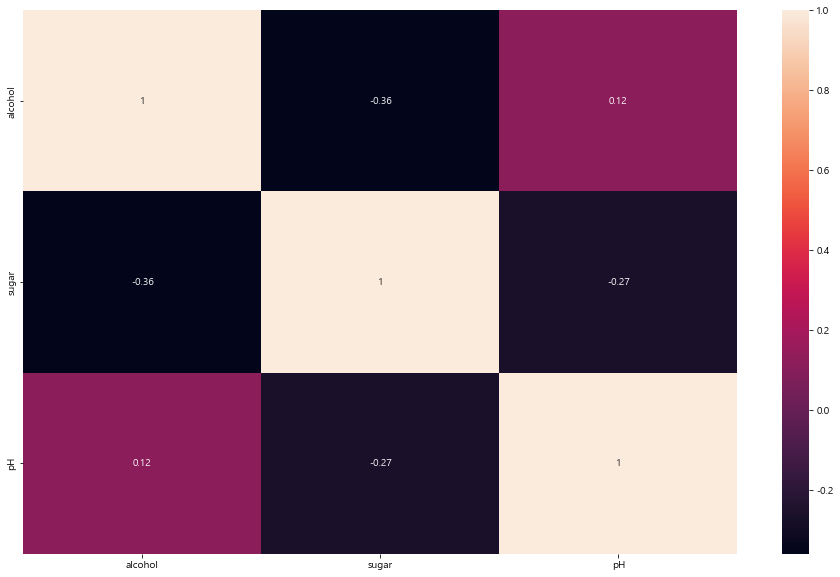

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))

sns.heatmap(wine.drop(columns='class',inplace=False).corr(), annot=True)

plt.show()

## 정규성 검정

### 히스토그램

In [21]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [51]:
data = wine[['alcohol', 'sugar', 'pH']]

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

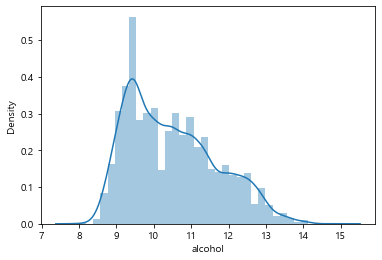

In [38]:
sns.distplot(wine['alcohol'])

<AxesSubplot:xlabel='sugar', ylabel='Density'>

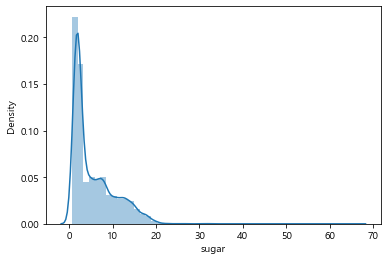

In [39]:
sns.distplot(wine['sugar'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

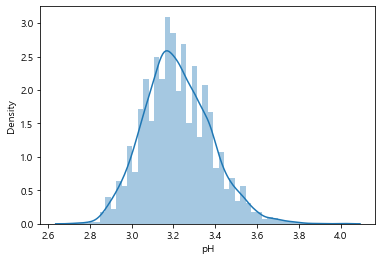

In [40]:
sns.distplot(wine['pH'])

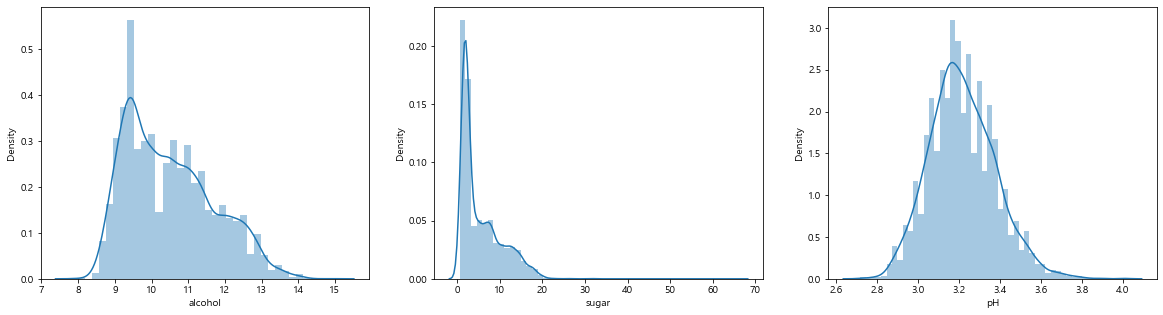

In [48]:
# for문과 subplot를 사용한 히스토그램 생성
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for col, ax in zip(data, axes.T.ravel()):   # T : transpose(전치행렬)
    sns.distplot(data[col], ax=ax)          # ravel : 1차원으로 변환

plt.show()

### 파이썬 내장함수 zip()
- 여러개의 iterable 자료형의 요소 개수가 동일할 때 사용한다.
- 각각의 요소를 순서대로 묶어서 새로운 iterable 자료형을 생성한다.
- iterable 자료형 예: 리스트, 튜플

In [49]:
a = [1, 2, 3]
b = [1, 2, 3]

for aa, bb in zip(a, b):
    print(aa, bb)

1 1
2 2
3 3


### 박스플롯

<AxesSubplot:>

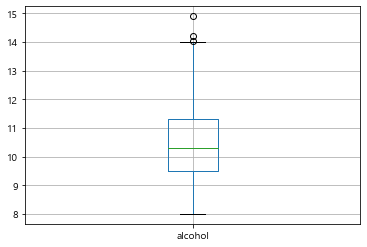

In [55]:
data[['alcohol']].boxplot()

<AxesSubplot:>

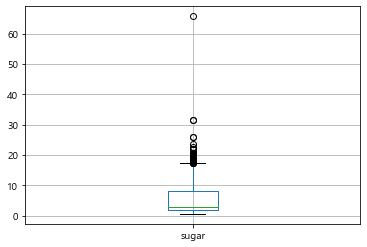

In [58]:
data[['sugar']].boxplot()

<AxesSubplot:>

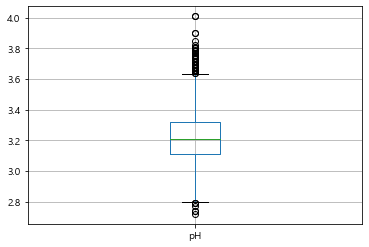

In [59]:
data[['pH']].boxplot()

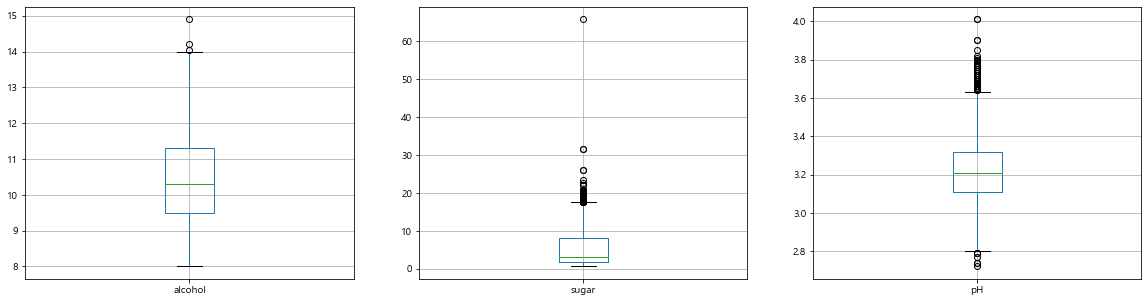

In [53]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for col, ax in zip(data, axes.T.ravel()):   # T : transpose(전치행렬)
    data[[col]].boxplot(ax=ax)              # ravel : 1차원으로 변환

plt.show()

### Q-Q Plot

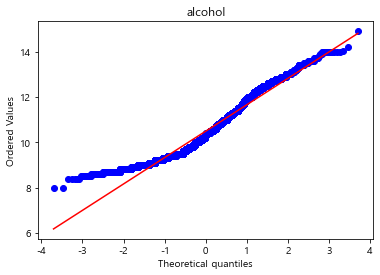

In [65]:
from scipy import stats

stats.probplot(data['alcohol'], dist=stats.norm, plot=plt)
plt.title('alcohol')

plt.show()

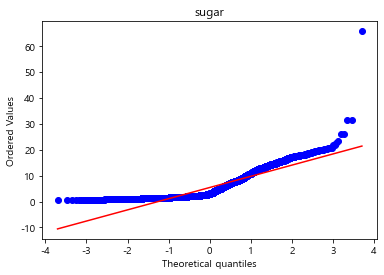

In [66]:
stats.probplot(data['sugar'], dist=stats.norm, plot=plt)
plt.title('sugar')

plt.show()

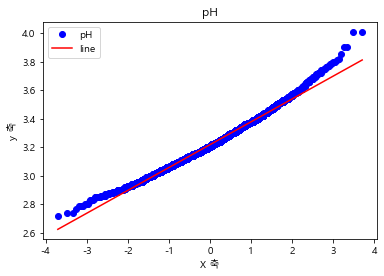

In [72]:
stats.probplot(data['pH'], dist=stats.norm, plot=plt)
plt.title('pH')

plt.xlabel('X 축')
plt.ylabel('y 축')
plt.legend(['pH', 'line'])
plt.show()

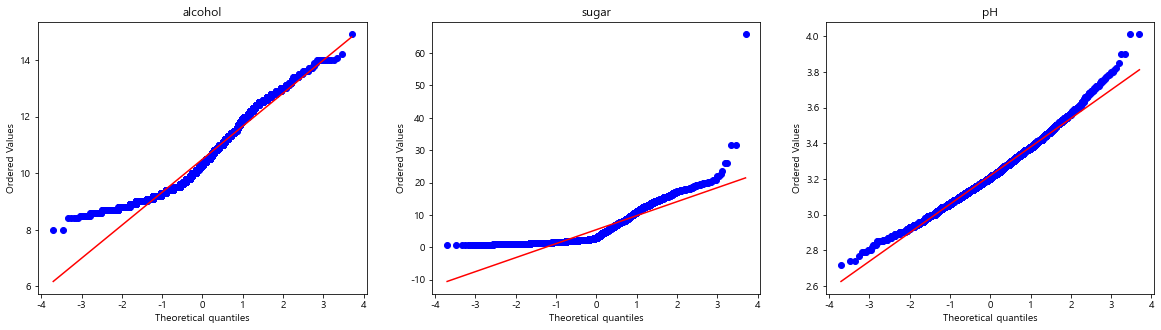

In [60]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

ncols = 3   # subplot 컬럼 수
nrows = 1   # subplot 행 수

fig, axes = plt.subplots(nrows, ncols)  # subplot 행, 열 설정
fig.set_size_inches((20, 5))            # subplot 사이즈 설정

for ax, i in zip(axes.T.ravel(), data):   # T : transpose(전치행렬), ravel : 1차원으로 변환
    stats.probplot(data[i], dist=stats.norm, plot=ax)   # dist=stats.norm : 정규성 검정
    ax.set_title(str(i))

plt.show()